In [1]:
import scanpy as sc
import scvelo as scv
import os
from anndata import AnnData as ad
import pandas as pd

Read dataset 

In [9]:
adata = scv.datasets.dentategyrus_lamanno("../../datasets/raw/dentategyrus.loom")

Save counts 

In [3]:
adata.layers["X_counts"] = adata.X.copy()

In [11]:
adata.write_h5ad("../../datasets/raw/dentategyrus.h5ad")

HVG selection

In [4]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="X_counts",
    subset=True,
)

Preprocess

In [5]:
sc.pp.log1p(adata)

In [6]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

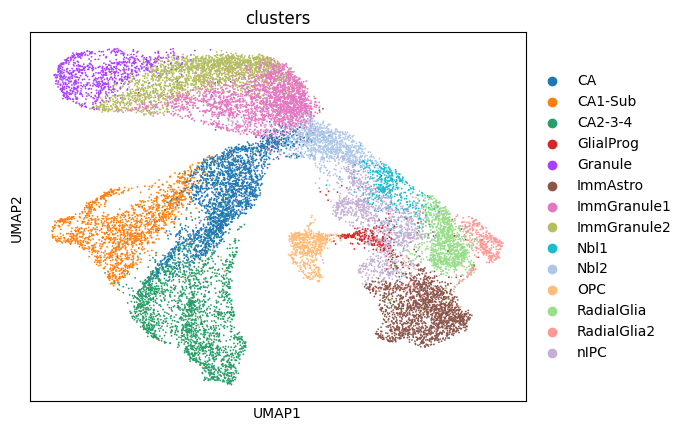

In [7]:
sc.pl.umap(adata, color=["clusters"])

In [8]:
adata.obs = adata.obs.rename({"clusters": "cell_type"})

In [14]:
adata

AnnData object with n_obs × n_vars = 18213 × 2000
    obs: 'Age', 'clusters', 'lib_size'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'clusters_colors', 'hvg', 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'X_counts'
    obsp: 'distances', 'connectivities'

Save

In [10]:
ad.write_h5ad(adata, "../datasets/processed/dentategyrus.h5ad")